In [1]:
# Dependencies
import os
import csv
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sn
import pandas as pd
import numpy as np

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [2]:
csv_path = "Resources/Official.csv"
#Read the CSV into a Panda DataFrame
data = pd.read_csv(csv_path)
data.head ()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,99556.0,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,99503.0,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,99744.0,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,99559.0,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,99652.0,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282


In [3]:
#Checking datatype
data['Print_Collection_Expenditures']

0         3021.0
1       700747.0
2         2206.0
3         8295.0
4        21552.0
          ...   
9166     63000.0
9167     68824.0
9168         0.0
9169     16000.0
9170     10671.0
Name: Print_Collection_Expenditures, Length: 9171, dtype: float64

In [4]:
data.shape

(9171, 46)

In [5]:
data.columns

Index(['State', 'Library ID', 'Submission Year', 'Library Name',
       'Street Address', 'City', 'Zip Code', 'Longitude', 'Latitude',
       'State Code', 'County Code', 'County', 'County Population',
       'Print_Collection_Expenditures', 'Digital_Collection_Expenditures',
       'Total Collection Expenditures', 'Total Operating Expenditures',
       'Print Collection', 'Digital Collection', 'Audio Collection',
       'Library Visits', 'Registered Users', 'Name', 'median_household_income',
       'total_population', 'median_age', 'per_capita', 'education_none',
       'education_high_school', 'education_ged', 'education_associates',
       'education_bachelors', 'education_masters', 'education_professional',
       'education_doctorate', 'state', 'zipcode', 'year',
       'education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'edu

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            9171 non-null   object 
 1   Library ID                       9171 non-null   object 
 2   Submission Year                  9171 non-null   int64  
 3   Library Name                     9171 non-null   object 
 4   Street Address                   9171 non-null   object 
 5   City                             9171 non-null   object 
 6   Zip Code                         9171 non-null   int64  
 7   Longitude                        9171 non-null   float64
 8   Latitude                         9171 non-null   float64
 9   State Code                       9171 non-null   int64  
 10  County Code                      9171 non-null   int64  
 11  County                           9171 non-null   object 
 12  County Population   

# Expenditures Scatter Plots

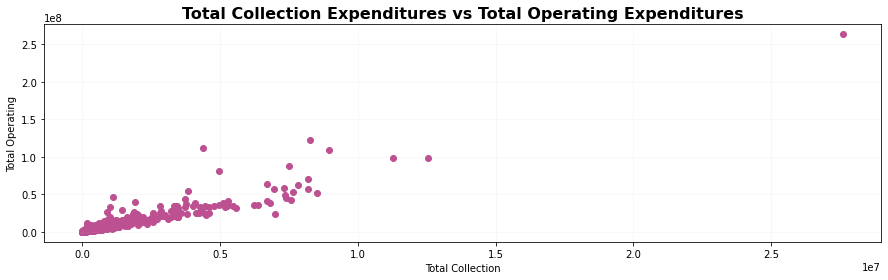

In [7]:
plt.figure(figsize=(15,4))

plt.scatter(data["Total Collection Expenditures"], data["Total Operating Expenditures"], color="#BC5090")

plt.title("Total Collection Expenditures vs Total Operating Expenditures", fontweight="bold", fontsize=16)
plt.xlabel("Total Collection")
plt.ylabel("Total Operating")

plt.grid(axis="both", alpha=0.1)

# plt.tight_layout()
plt.savefig("total_collection_vs_total_operating.png")
plt.show()

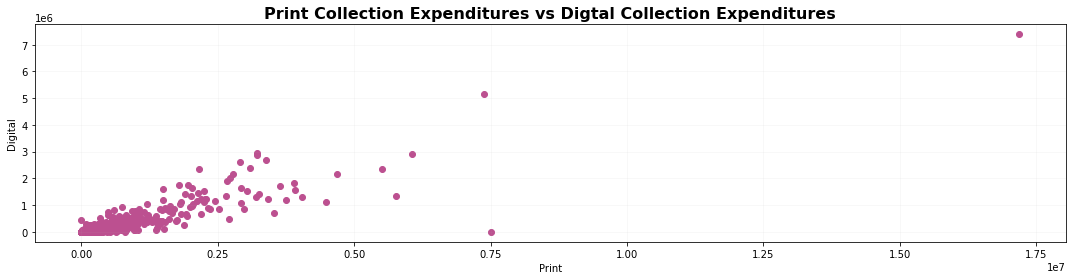

In [8]:
plt.figure(figsize=(15,4))

plt.scatter(data.Print_Collection_Expenditures, data.Digital_Collection_Expenditures, color="#BC5090")

plt.title("Print Collection Expenditures vs Digtal Collection Expenditures", fontweight="bold", fontsize=16)
plt.xlabel("Print")
plt.ylabel("Digital")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("print_vs_digital.png")
plt.show()

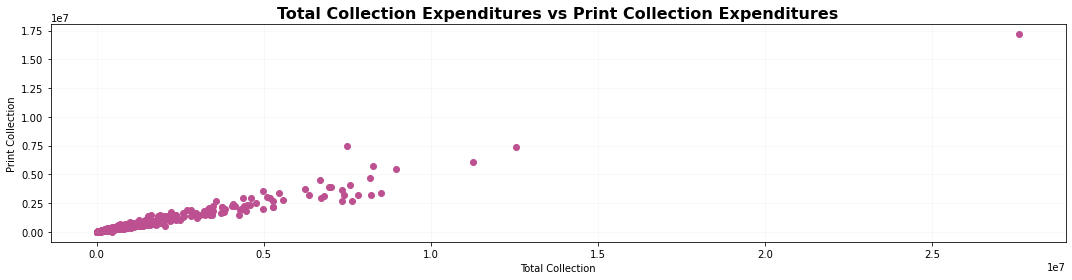

In [9]:
plt.figure(figsize=(15,4))

plt.scatter(data["Total Collection Expenditures"], data["Print_Collection_Expenditures"], color="#BC5090")

plt.title("Total Collection Expenditures vs Print Collection Expenditures", fontweight="bold", fontsize=16)
plt.xlabel("Total Collection")
plt.ylabel("Print Collection")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("total_collection_vs_print_collection.png")
plt.show()

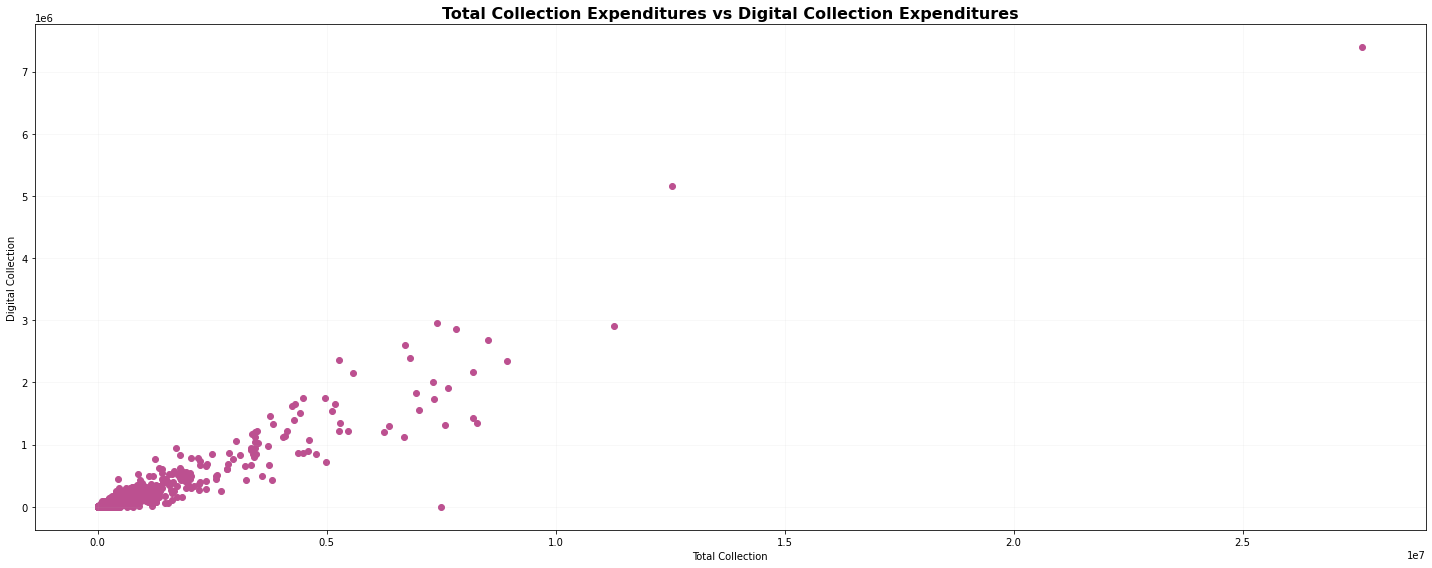

In [10]:
plt.figure(figsize=(20,8))

plt.scatter(data["Total Collection Expenditures"], data.Digital_Collection_Expenditures, color="#BC5090")

plt.title("Total Collection Expenditures vs Digital Collection Expenditures", fontweight="bold", fontsize=16)
plt.xlabel("Total Collection")
plt.ylabel("Digital Collection")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("total_collection_vs_digital.png")
plt.show()

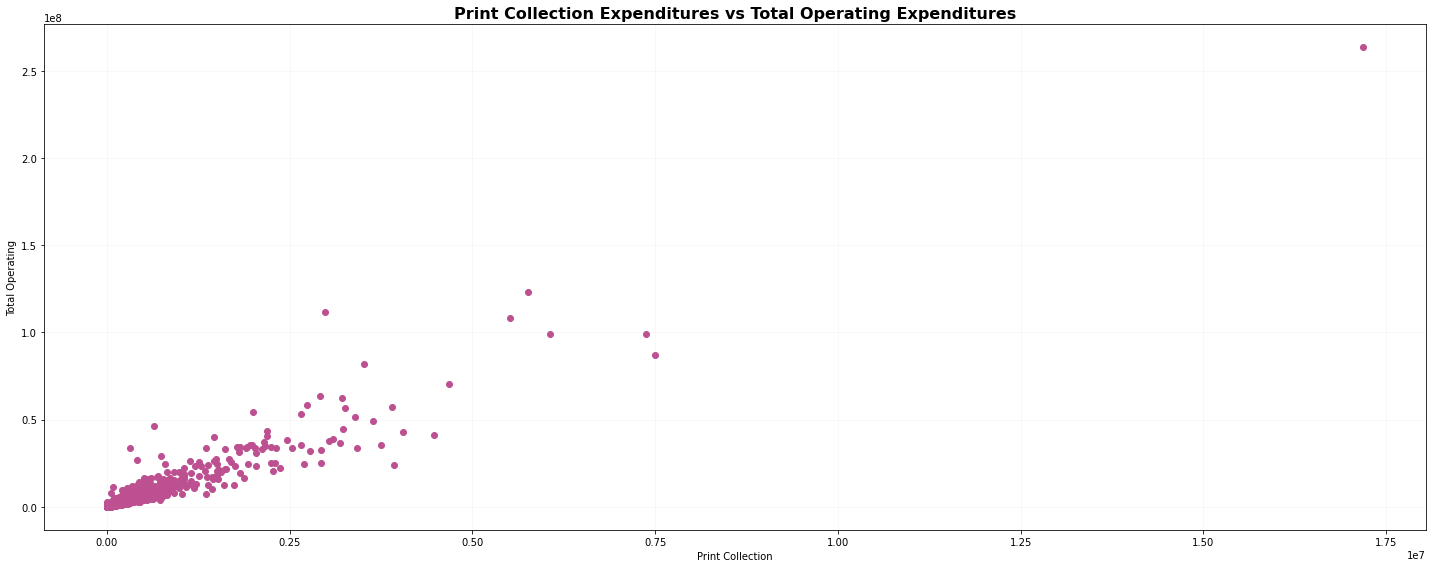

In [11]:
plt.figure(figsize=(20,8))

plt.scatter(data.Print_Collection_Expenditures, data["Total Operating Expenditures"], color="#BC5090")

plt.title("Print Collection Expenditures vs Total Operating Expenditures", fontweight="bold", fontsize=16)
plt.xlabel("Print Collection")
plt.ylabel("Total Operating")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("print_collection_vs_total_operating.png")
plt.show()

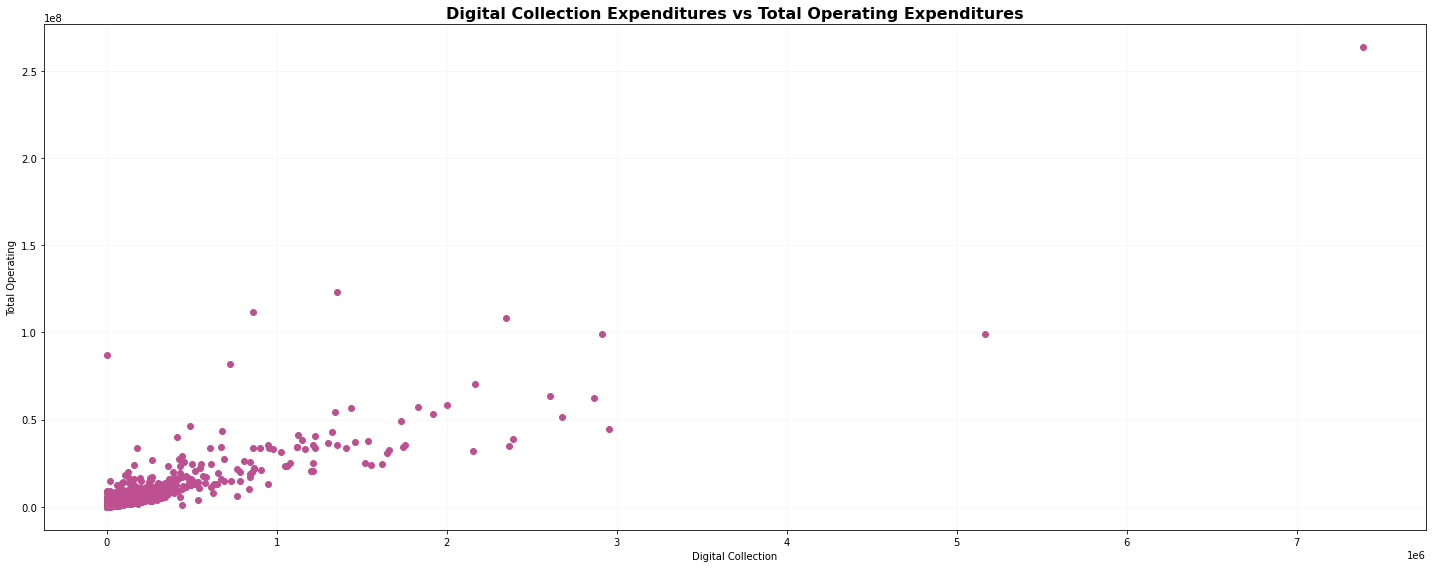

In [12]:
plt.figure(figsize=(20,8))

plt.scatter(data.Digital_Collection_Expenditures, data["Total Operating Expenditures"], color="#BC5090")

plt.title("Digital Collection Expenditures vs Total Operating Expenditures", fontweight="bold", fontsize=16)
plt.xlabel("Digital Collection")
plt.ylabel("Total Operating")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("digital_collection_vs_total_operating.png")
plt.show()

# Linear Regressions

In [13]:
# linear modelling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

None vs GED

The r-squared is: 0.4143090172327295


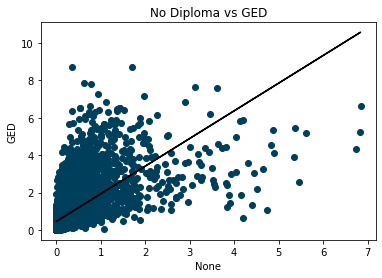

In [14]:
# Print out the r-squared value along with the plot.
x_values = data['education_none_perc']
y_values = data['education_ged_perc']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#003F5C")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(1750,-20),fontsize=15)
plt.xlabel('None')
plt.ylabel('GED')
plt.title("No Diploma vs GED")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [15]:
feature = data["education_none_perc"]
target = data["education_ged_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     education_ged_perc   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     6486.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:38:12   Log-Likelihood:                -10782.
No. Observations:                9171   AIC:                         2.157e+04
Df Residuals:                    9169   BIC:                         2.158e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4484      0.009     49.558      0.000       0.431       0.466
education_none_perc     1.4803      0.018     80.536      0.000       1.444       1.516
==============================================================================
Omnibus:                     3757.777   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55921.914
Skew:                           1.561   Prob(JB):                         0.00
Kurtosis:                      14.688   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[1.48027572]
0.4483612177771465


In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [18]:
actual = data["education_none_perc"]
predictions = reg.predict(data["education_ged_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -16.545172907532066
MSE: 3.482155076258589
RMSE: 1.8660533422864922
MAE: 1.3651381065921755


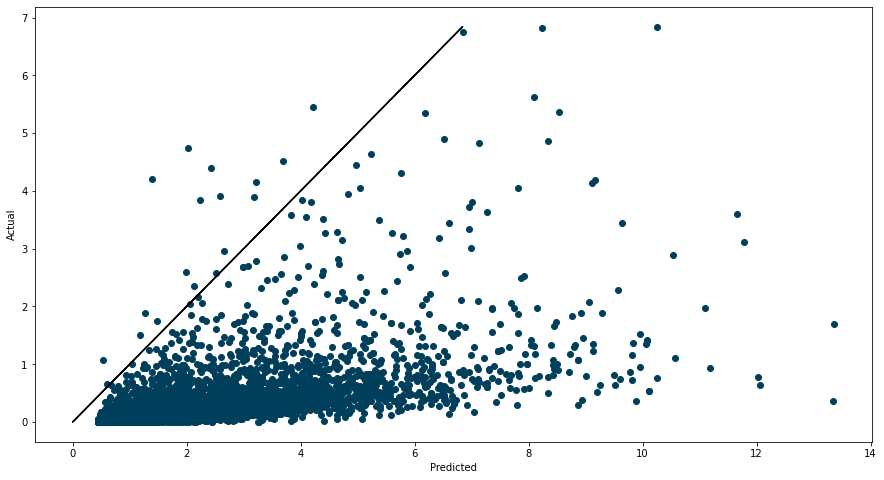

In [19]:
plt.figure(figsize=(15,8))

plt.scatter(predictions, actual, color="#003F5C")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

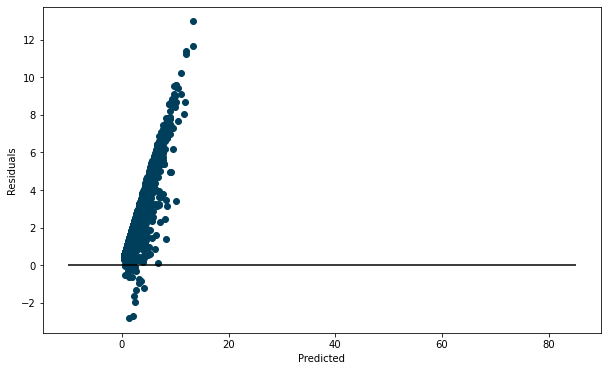

In [20]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#003F5C")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

None vs High School
"education_none_perc"
"education_high_school_perc"

The r-squared is: 0.5014453758503118


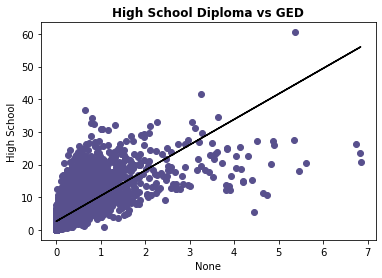

In [21]:
# Print out the r-squared value along with the plot.
x_values = data['education_none_perc']
y_values = data['education_high_school_perc']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#58508D")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(1750,-20),fontsize=15)
plt.xlabel('None')
plt.ylabel("High School")
plt.title("High School Diploma vs GED", fontweight="bold")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [22]:
feature = data["education_none_perc"]
target = data["education_high_school_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     education_high_school_perc   R-squared:                       0.501
Model:                                    OLS   Adj. R-squared:                  0.501
Method:                         Least Squares   F-statistic:                     9222.
Date:                        Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                                16:38:12   Log-Likelihood:                -24411.
No. Observations:                        9171   AIC:                         4.883e+04
Df Residuals:                            9169   BIC:                         4.884e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6266      0.040     65.690      0.000       2.548       2.705
education_none_perc     7.8011      0.081     96.032      0.000       7.642       7.960
==============================================================================
Omnibus:                     2488.817   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46294.730
Skew:                           0.826   Prob(JB):                         0.00
Kurtosis:                      13.882   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[7.80112826]
2.626625843101287


In [24]:
actual = data["education_none_perc"]
predictions = reg.predict(data["education_high_school_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -13666.632784189189
MSE: 2712.587509438069
RMSE: 52.08250675071304
MAE: 35.64648786246413


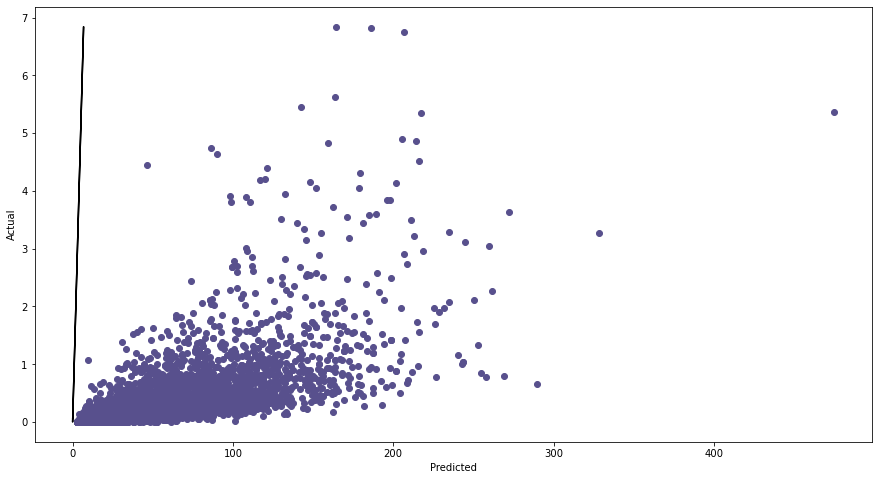

In [25]:
plt.figure(figsize=(15,8))

plt.scatter(predictions, actual, color="#58508D")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

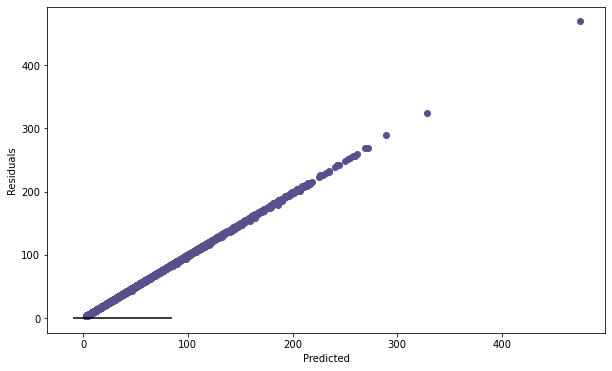

In [26]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#58508D")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

None vs Associates "education_none_perc" "education_associates_perc"

The r-squared is: 0.37433387671785506


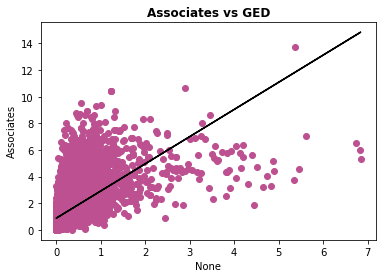

In [27]:
# Print out the r-squared value along with the plot.
x_values = data['education_none_perc']
y_values = data['education_associates_perc']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#BC5090")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(1750,-20),fontsize=15)
plt.xlabel('None')
plt.ylabel("Associates")
plt.title("Associates vs GED", fontweight="bold")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [28]:
feature = data["education_none_perc"]
target = data["education_associates_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     education_associates_perc   R-squared:                       0.374
Model:                                   OLS   Adj. R-squared:                  0.374
Method:                        Least Squares   F-statistic:                     5486.
Date:                       Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                               16:38:13   Log-Likelihood:                -14499.
No. Observations:                       9171   AIC:                         2.900e+04
Df Residuals:                           9169   BIC:                         2.902e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8773      0.014     64.663      0.000       0.851       0.904
education_none_perc     2.0416      0.028     74.066      0.000       1.988       2.096
==============================================================================
Omnibus:                     2885.525   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22635.196
Skew:                           1.291   Prob(JB):                         0.00
Kurtosis:                      10.251   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[2.04158787]
0.8773276701434107


In [30]:
actual = data["education_none_perc"]
predictions = reg.predict(data["education_associates_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -94.0002889068089
MSE: 18.854515712459218
RMSE: 4.34217868269596
MAE: 3.33160258970918


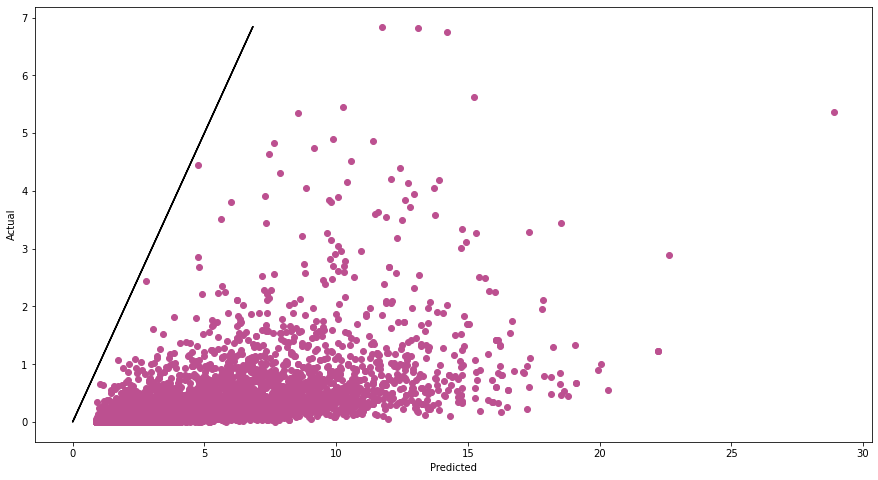

In [31]:
plt.figure(figsize=(15,8))

plt.scatter(predictions, actual, color="#BC5090")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

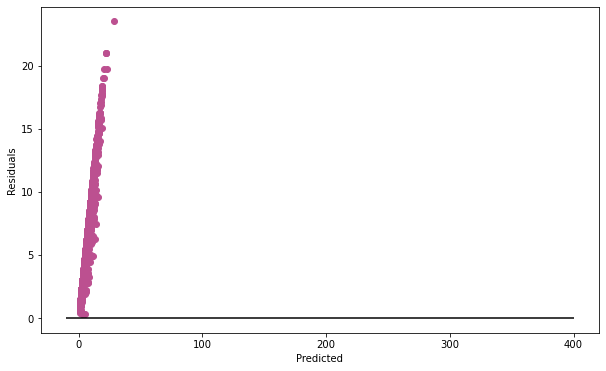

In [32]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#BC5090")
plt.hlines(0, -10, 400, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

None vs Bachelors "education_none_perc" "education_bachelors_perc"

The r-squared is: 0.25214682331019866


C:\Users\E5450\AppData\Local\Temp/ipykernel_6972/1515941193.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="black")


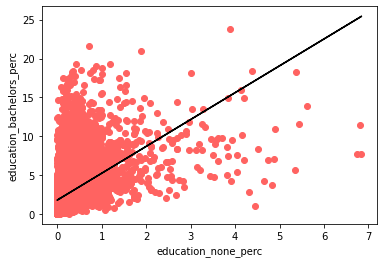

In [33]:
# Print out the r-squared value along with the plot.
x_values = data['education_none_perc']
y_values = data['education_bachelors_perc']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#FF6361")
plt.plot(x_values,regress_values,"r-", color="black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_none_perc')
plt.ylabel('education_bachelors_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [34]:
feature = data["education_none_perc"]
target = data["education_bachelors_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_bachelors_perc   R-squared:                       0.252
Model:                                  OLS   Adj. R-squared:                  0.252
Method:                       Least Squares   F-statistic:                     3091.
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                              16:38:14   Log-Likelihood:                -21958.
No. Observations:                      9171   AIC:                         4.392e+04
Df Residuals:                          9169   BIC:                         4.394e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.7753      0.031     58.011      0.000       1.715       1.835
education_none_perc     3.4569      0.062     55.601      0.000       3.335       3.579
==============================================================================
Omnibus:                     3520.034   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19747.769
Skew:                           1.755   Prob(JB):                         0.00
Kurtosis:                       9.274   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[3.45685623]
1.7752970898173623


In [36]:
actual = data["education_none_perc"]
predictions = reg.predict(data["education_bachelors_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -1067.0841244410026
MSE: 211.98050172516656
RMSE: 14.559550189657871
MAE: 10.20423529323866


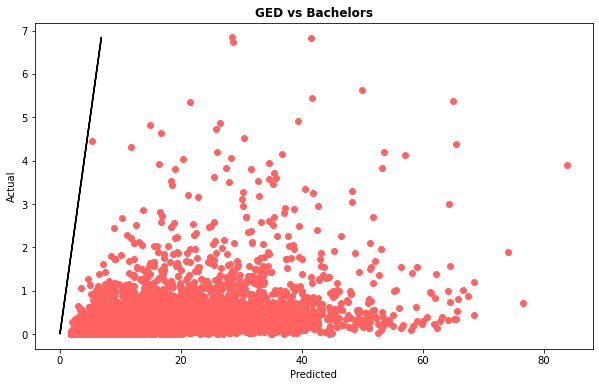

In [37]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FF6361")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GED vs Bachelors", fontweight="bold")

plt.show()

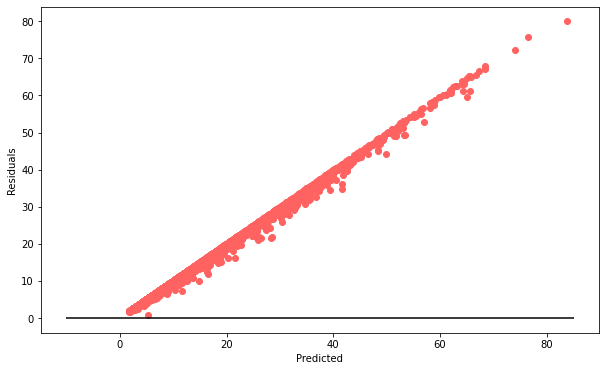

In [38]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#FF6361")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

None vs Masters "education_none_perc" "education_masters_perc"

The r-squared is: 0.15620040292093043


C:\Users\E5450\AppData\Local\Temp/ipykernel_6972/3715682474.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="black")


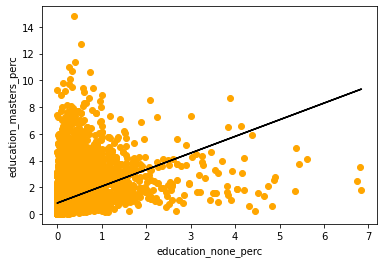

In [39]:
# Print out the r-squared value along with the plot.
x_values = data["education_none_perc"]
y_values = data["education_masters_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#FFA600")
plt.plot(x_values,regress_values,"r-", color="black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_none_perc')
plt.ylabel('education_masters_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [40]:
feature = data["education_none_perc"]
target = data["education_masters_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     education_masters_perc   R-squared:                       0.156
Model:                                OLS   Adj. R-squared:                  0.156
Method:                     Least Squares   F-statistic:                     1697.
Date:                    Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                            16:38:15   Log-Likelihood:                -15353.
No. Observations:                    9171   AIC:                         3.071e+04
Df Residuals:                        9169   BIC:                         3.072e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8166      0.015     54.839      0.000       0.787       0.846
education_none_perc     1.2464      0.030     41.199      0.000       1.187       1.306
==============================================================================
Omnibus:                     4737.565   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43786.914
Skew:                           2.303   Prob(JB):                         0.00
Kurtosis:                      12.663   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[1.24641532]
0.8166433410989185


In [42]:
actual = data["education_none_perc"]
predictions = reg.predict(data["education_masters_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -31.511220667157176
MSE: 6.452436386814081
RMSE: 2.540164637737893
MAE: 1.960649562010423


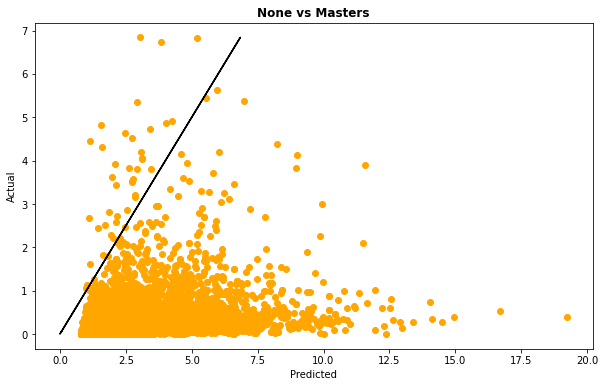

In [43]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FFA600")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("None vs Masters", fontweight="bold")

plt.show()

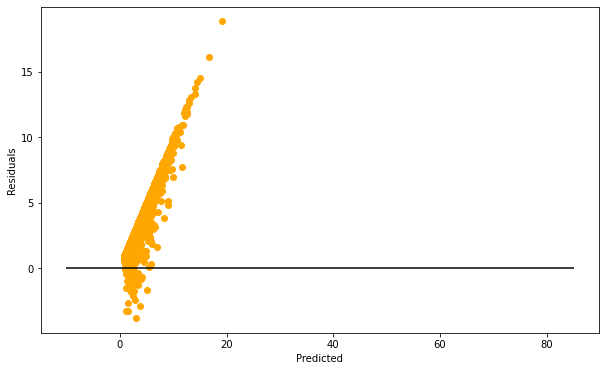

In [44]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#FFA600")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

None vs Professional "education_none_perc" "education_professional_perc"

The r-squared is: 0.11059375716760113


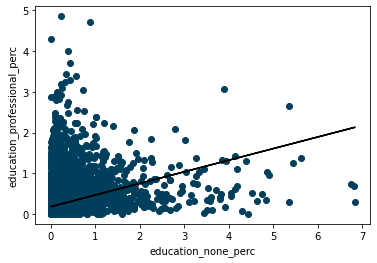

In [45]:
# Print out the r-squared value along with the plot.
x_values = data["education_none_perc"]
y_values = data["education_professional_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#003F5C")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_none_perc')
plt.ylabel('education_professional_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [46]:
feature = data["education_none_perc"]
target = data["education_professional_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     education_professional_perc   R-squared:                       0.111
Model:                                     OLS   Adj. R-squared:                  0.110
Method:                          Least Squares   F-statistic:                     1140.
Date:                         Tue, 08 Feb 2022   Prob (F-statistic):          1.12e-235
Time:                                 16:38:16   Log-Likelihood:                -3644.6
No. Observations:                         9171   AIC:                             7293.
Df Residuals:                             9169   BIC:                             7307.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1807      0.004     43.497      0.000       0.173       0.189
education_none_perc     0.2850      0.008     33.766      0.000       0.268       0.302
==============================================================================
Omnibus:                     6949.809   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177402.199
Skew:                           3.428   Prob(JB):                         0.00
Kurtosis:                      23.427   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.28498486]
0.180702273610244


In [48]:
actual = data["education_none_perc"]
predictions = reg.predict(data["education_professional_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.09477564182128928
MSE: 0.17965805242259678
RMSE: 0.42386088805479183
MAE: 0.23331487145760085


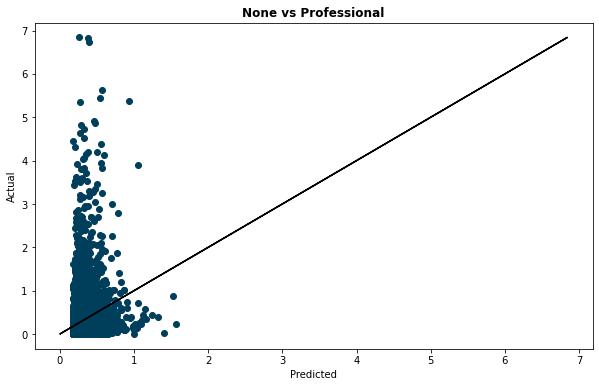

In [49]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#003F5C")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("None vs Professional", fontweight="bold")

plt.show()

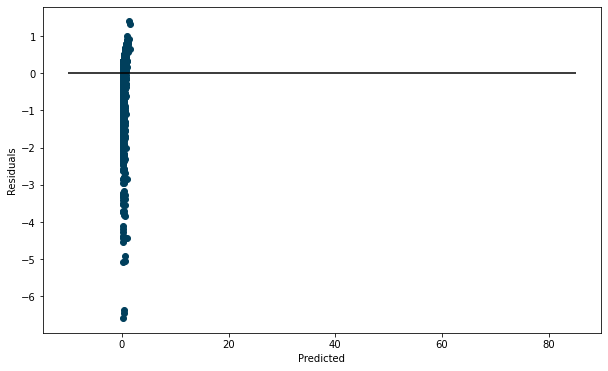

In [50]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#003F5C")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

None vs Doctorate "education_none_perc" "education_doctorate_perc"

The r-squared is: 0.050890134781231146


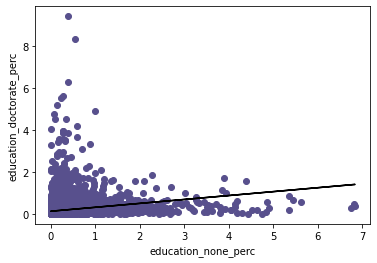

In [51]:
# Print out the r-squared value along with the plot.
x_values = data["education_none_perc"]
y_values = data["education_doctorate_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#58508D")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_none_perc')
plt.ylabel('education_doctorate_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [52]:
feature = data["education_none_perc"]
target = data["education_doctorate_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_doctorate_perc   R-squared:                       0.051
Model:                                  OLS   Adj. R-squared:                  0.051
Method:                       Least Squares   F-statistic:                     491.6
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):          3.75e-106
Time:                              16:38:16   Log-Likelihood:                -3645.1
No. Observations:                      9171   AIC:                             7294.
Df Residuals:                          9169   BIC:                             7308.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1329      0.004     32.001      0.000       0.125       0.141
education_none_perc     0.1871      0.008     22.173      0.000       0.171       0.204
==============================================================================
Omnibus:                    13264.837   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6610453.527
Skew:                           8.556   Prob(JB):                         0.00
Kurtosis:                     133.408   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.18714961]
0.13294991649302573


In [54]:
actual = data["education_none_perc"]
predictions = reg.predict(data["education_bachelors_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -1.1374951520811671
MSE: 0.4242243512517494
RMSE: 0.6513250734093916
MAE: 0.44764842205071326


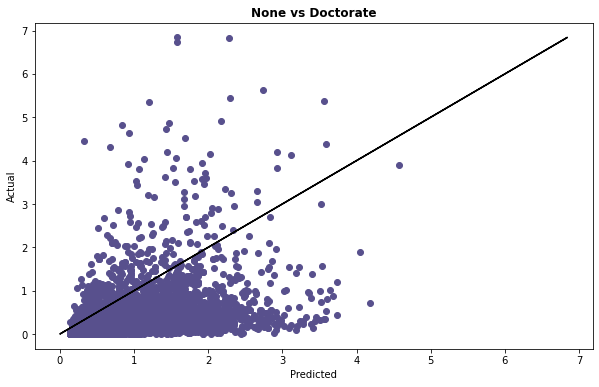

In [55]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#58508D")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("None vs Doctorate", fontweight="bold")

plt.show()

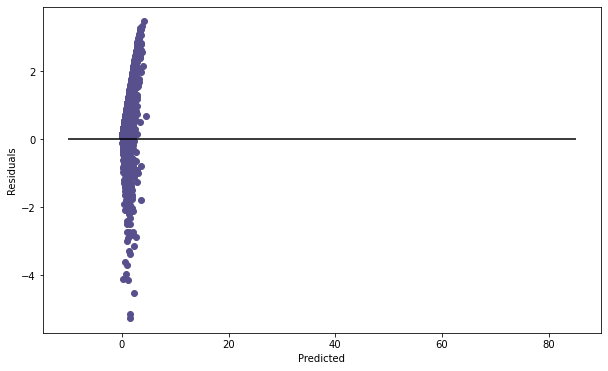

In [56]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#58508D")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

GED vs High School "education_ged_school_perc" "education_high_school_perc"

The r-squared is: 0.7484231140920347


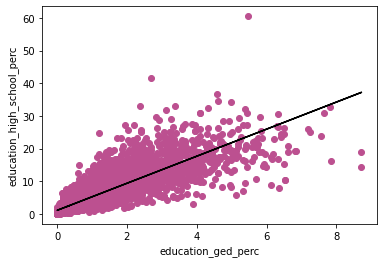

In [57]:
# Print out the r-squared value along with the plot.
x_values = data["education_ged_perc"]
y_values = data["education_high_school_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#BC5090")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_ged_perc')
plt.ylabel('education_high_school_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [58]:
feature = data["education_ged_perc"]
target = data["education_high_school_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     education_high_school_perc   R-squared:                       0.748
Model:                                    OLS   Adj. R-squared:                  0.748
Method:                         Least Squares   F-statistic:                 2.728e+04
Date:                        Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                                16:38:17   Log-Likelihood:                -21275.
No. Observations:                        9171   AIC:                         4.255e+04
Df Residuals:                            9169   BIC:                         4.257e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1174      0.032     34.938      0.000       1.055       1.180
education_ged_perc     4.1442      0.025    165.158      0.000       4.095       4.193
==============================================================================
Omnibus:                     3965.724   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134980.804
Skew:                           1.426   Prob(JB):                         0.00
Kurtosis:                      21.577   Cond. No.                         2.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[4.14418157]
1.1173826999465342


In [60]:
actual = data["education_ged_perc"]
predictions = reg.predict(data["education_professional_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -3.055860235590486
MSE: 4.2573002939993945
RMSE: 2.063322634490155
MAE: 1.4952652783428881


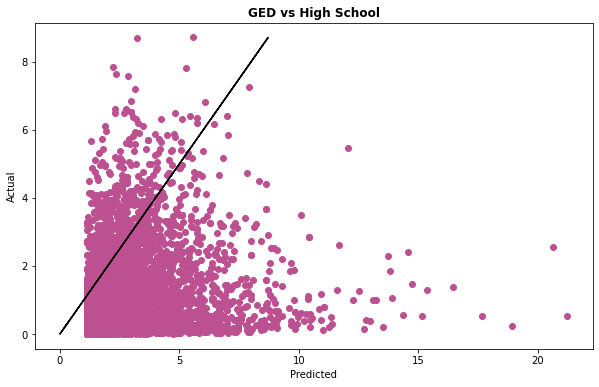

In [61]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#BC5090")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GED vs High School", fontweight="bold")

plt.show()

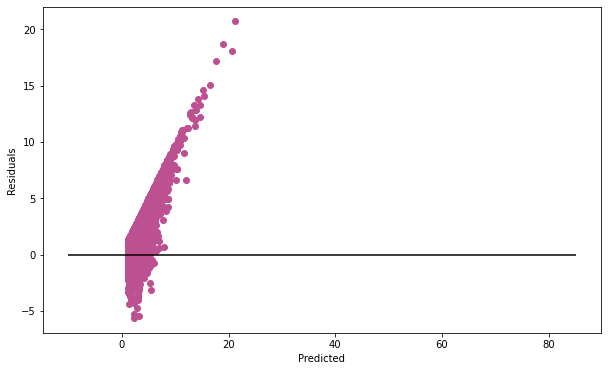

In [62]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#BC5090")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

GED vs Professional "education_ged_perc" "education_professional_perc"

The r-squared is: 0.12196525647187448


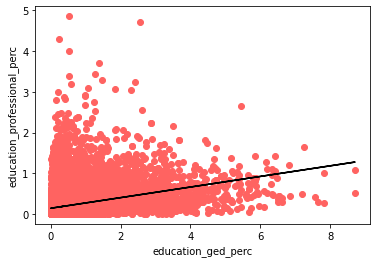

In [63]:
# Print out the r-squared value along with the plot.
x_values = data["education_ged_perc"]
y_values = data["education_professional_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#FF6361")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_ged_perc')
plt.ylabel('education_professional_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [64]:
feature = data["education_ged_perc"]
target = data["education_professional_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     education_professional_perc   R-squared:                       0.122
Model:                                     OLS   Adj. R-squared:                  0.122
Method:                          Least Squares   F-statistic:                     1274.
Date:                         Tue, 08 Feb 2022   Prob (F-statistic):          2.55e-261
Time:                                 16:38:18   Log-Likelihood:                -3585.6
No. Observations:                         9171   AIC:                             7175.
Df Residuals:                             9169   BIC:                             7189.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1417      0.005     30.485      0.000       0.133       0.151
education_ged_perc     0.1301      0.004     35.688      0.000       0.123       0.137
==============================================================================
Omnibus:                     7320.319   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200276.317
Skew:                           3.687   Prob(JB):                         0.00
Kurtosis:                      24.674   Cond. No.                         2.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.130135]
0.14168504304546986


In [66]:
actual = data["education_ged_perc"]
predictions = reg.predict(data["education_professional_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.2947860854589226
MSE: 1.3590934751448778
RMSE: 1.1658016448542512
MAE: 0.6421651669367018


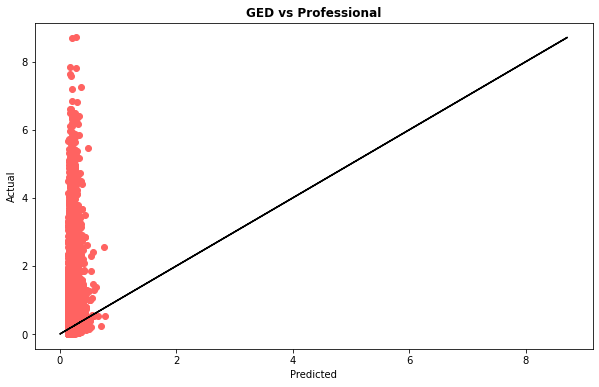

In [67]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FF6361")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GED vs Professional", fontweight="bold")

plt.show()

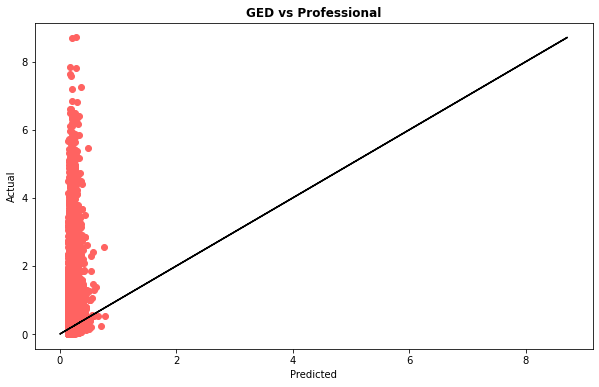

In [68]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FF6361")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GED vs Professional", fontweight="bold")

plt.show()

GED vs Associates "education_ged_perc" "education_associates_perc"

The r-squared is: 0.6114735768135129


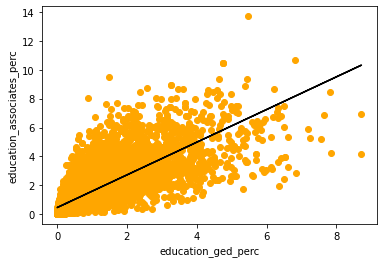

In [69]:
# Print out the r-squared value along with the plot.
x_values = data["education_ged_perc"]
y_values = data["education_associates_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#FFA600")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_ged_perc')
plt.ylabel('education_associates_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [70]:
feature = data["education_ged_perc"]
target = data["education_associates_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     education_associates_perc   R-squared:                       0.611
Model:                                   OLS   Adj. R-squared:                  0.611
Method:                        Least Squares   F-statistic:                 1.443e+04
Date:                       Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                               16:38:19   Log-Likelihood:                -12314.
No. Observations:                       9171   AIC:                         2.463e+04
Df Residuals:                           9169   BIC:                         2.465e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4444      0.012     36.914      0.000       0.421       0.468
education_ged_perc     1.1346      0.009    120.127      0.000       1.116       1.153
==============================================================================
Omnibus:                     2448.118   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17847.985
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       9.481   Cond. No.                         2.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[1.13461086]
0.4443956067051329


In [72]:
actual = data["education_ged_perc"]
predictions = reg.predict(data["education_professional_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.11494562194944435
MSE: 0.929011860619875
RMSE: 0.963852613535843
MAE: 0.6245672240008147


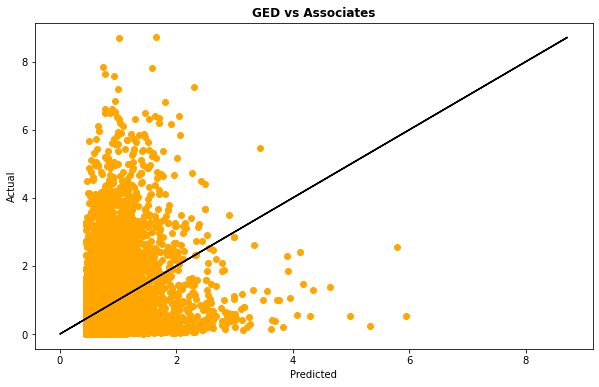

In [73]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FFA600")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GED vs Associates", fontweight="bold")

plt.show()

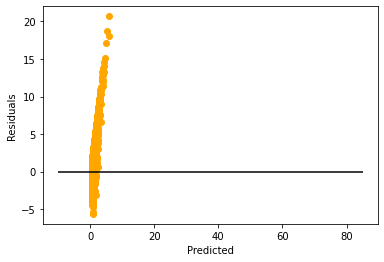

In [74]:
plt.scatter(predictions, residuals, color="#FFA600")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

GED vs Bachelors "education_ged_perc" "education_bachelors_perc"

The r-squared is: 0.305355999238248


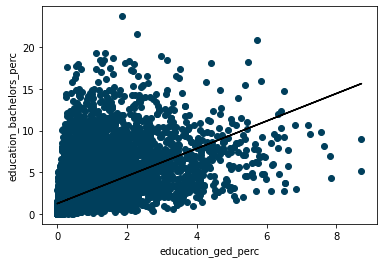

In [75]:
# Print out the r-squared value along with the plot.
x_values = data["education_ged_perc"]
y_values = data["education_bachelors_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#003F5C")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_ged_perc')
plt.ylabel('education_bachelors_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [76]:
feature = data["education_ged_perc"]
target = data["education_associates_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     education_associates_perc   R-squared:                       0.611
Model:                                   OLS   Adj. R-squared:                  0.611
Method:                        Least Squares   F-statistic:                 1.443e+04
Date:                       Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                               16:38:19   Log-Likelihood:                -12314.
No. Observations:                       9171   AIC:                         2.463e+04
Df Residuals:                           9169   BIC:                         2.465e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4444      0.012     36.914      0.000       0.421       0.468
education_ged_perc     1.1346      0.009    120.127      0.000       1.116       1.153
==============================================================================
Omnibus:                     2448.118   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17847.985
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       9.481   Cond. No.                         2.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[1.13461086]
0.4443956067051329


In [78]:
actual = data["education_ged_perc"]
predictions = reg.predict(data["education_associates_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -1.4318564619530387
MSE: 2.5526380666639765
RMSE: 1.5976977394563643
MAE: 1.2081566723767587


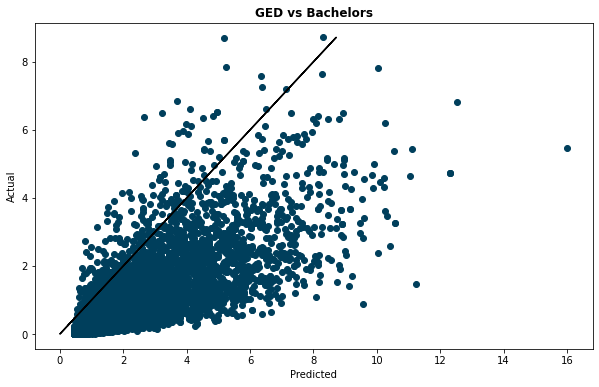

In [79]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#003F5C")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GED vs Bachelors", fontweight="bold")

plt.show()

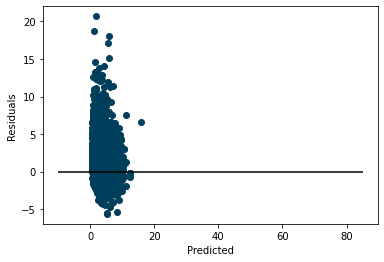

In [80]:
plt.scatter(predictions, residuals, color="#003F5C")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

GED vs Masters "education_ged_perc" "education_masters_perc"

The r-squared is: 0.22050762211345254


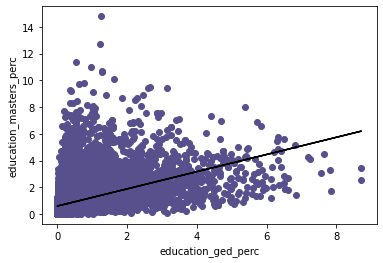

In [81]:
# Print out the r-squared value along with the plot.
x_values = data["education_ged_perc"]
y_values = data["education_masters_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#58508D")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_ged_perc')
plt.ylabel('education_masters_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [82]:
feature = data["education_ged_perc"]
target = data["education_masters_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     education_masters_perc   R-squared:                       0.221
Model:                                OLS   Adj. R-squared:                  0.220
Method:                     Least Squares   F-statistic:                     2594.
Date:                    Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                            16:38:20   Log-Likelihood:                -14989.
No. Observations:                    9171   AIC:                         2.998e+04
Df Residuals:                        9169   BIC:                         3.000e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5893      0.016     36.566      0.000       0.558       0.621
education_ged_perc     0.6440      0.013     50.929      0.000       0.619       0.669
==============================================================================
Omnibus:                     5380.135   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56842.166
Skew:                           2.671   Prob(JB):                         0.00
Kurtosis:                      13.964   Cond. No.                         2.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.64395139]
0.5892901212635431


In [84]:
actual = data["education_ged_perc"]
predictions = reg.predict(data["education_masters_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.21301138610391535
MSE: 1.2732573192165166
RMSE: 1.128387043180006
MAE: 0.8244926347983339


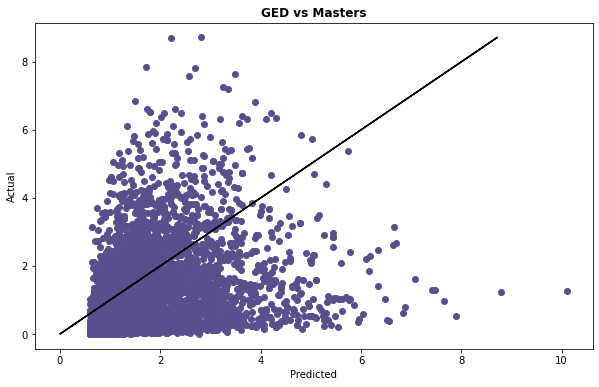

In [85]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#58508D")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GED vs Masters", fontweight="bold")

plt.show()

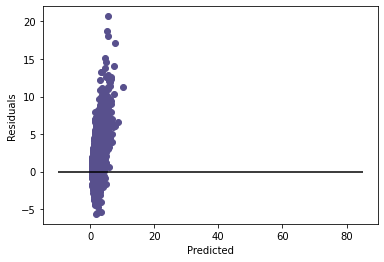

In [86]:
plt.scatter(predictions, residuals, color="#58508D")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

GED vs Doctorate "education_ged_perc" "education_doctorate_perc"

The r-squared is: 0.06659726297572108


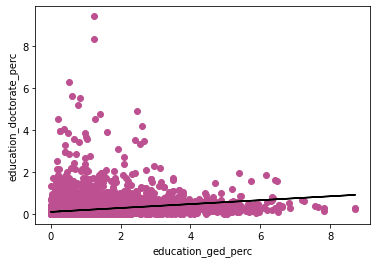

In [87]:
# Print out the r-squared value along with the plot.
x_values = data["education_ged_perc"]
y_values = data["education_doctorate_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#BC5090")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_ged_perc')
plt.ylabel('education_doctorate_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [88]:
feature = data["education_ged_perc"]
target = data["education_doctorate_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_doctorate_perc   R-squared:                       0.067
Model:                                  OLS   Adj. R-squared:                  0.066
Method:                       Least Squares   F-statistic:                     654.2
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):          1.95e-139
Time:                              16:38:21   Log-Likelihood:                -3568.5
No. Observations:                      9171   AIC:                             7141.
Df Residuals:                          9169   BIC:                             7155.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1015      0.005     21.888      0.000       0.092       0.111
education_ged_perc     0.0931      0.004     25.577      0.000       0.086       0.100
==============================================================================
Omnibus:                    13419.410   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7034660.740
Skew:                           8.741   Prob(JB):                         0.00
Kurtosis:                     137.550   Cond. No.                         2.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.09309361]
0.10153918305736875


In [90]:
actual = data["education_ged_perc"]
predictions = reg.predict(data["education_doctorate_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.37480154940027854
MSE: 1.4430830207344432
RMSE: 1.2012839051341873
MAE: 0.6689777854334588


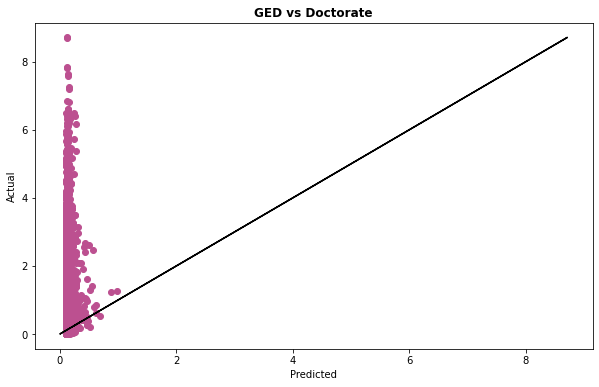

In [91]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#BC5090")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GED vs Doctorate", fontweight="bold")

plt.show()

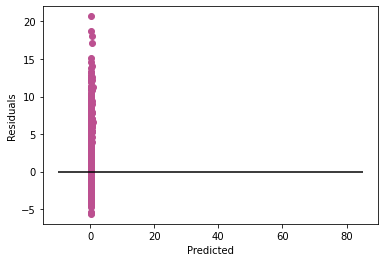

In [92]:
plt.scatter(predictions, residuals, color="#BC5090")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

High School vs Professional "education_high_school_perc" "education_professional_perc"

The r-squared is: 0.19409517666672052


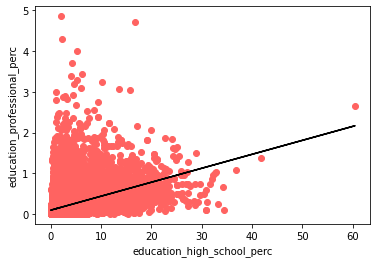

In [93]:
# Print out the r-squared value along with the plot.
x_values = data["education_high_school_perc"]
y_values = data["education_professional_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#FF6361")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_high_school_perc')
plt.ylabel('education_professional_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [94]:
feature = data["education_high_school_perc"]
target = data["education_professional_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     education_professional_perc   R-squared:                       0.194
Model:                                     OLS   Adj. R-squared:                  0.194
Method:                          Least Squares   F-statistic:                     2208.
Date:                         Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                                 16:38:22   Log-Likelihood:                -3192.5
No. Observations:                         9171   AIC:                             6389.
Df Residuals:                             9169   BIC:                             6403.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0944      0.005     19.914      0.000       0.085       0.104
education_high_school_perc     0.0343      0.001     46.992      0.000       0.033       0.036
==============================================================================
Omnibus:                     7706.629   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           259744.210
Skew:                           3.907   Prob(JB):                         0.00
Kurtosis:                      27.873   Cond. No.                         8.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.03427033]
0.0943788067682915


In [96]:
actual = data["education_high_school_perc"]
predictions = reg.predict(data["education_professional_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.7150584117244612
MSE: 41.31051199743986
RMSE: 6.427325415555047
MAE: 4.157656094276058


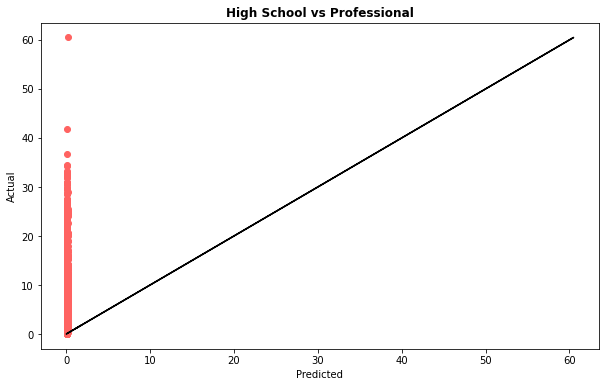

In [97]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FF6361")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("High School vs Professional", fontweight="bold")

plt.show()

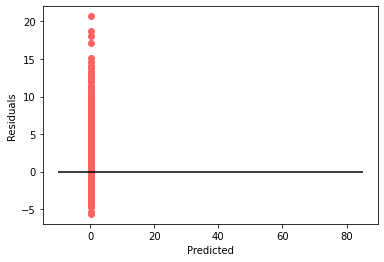

In [98]:
plt.scatter(predictions, residuals, color="#FF6361")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

High School vs Associates "education_high_school_perc" "education_associates_perc"

The r-squared is: 0.7787521387113904


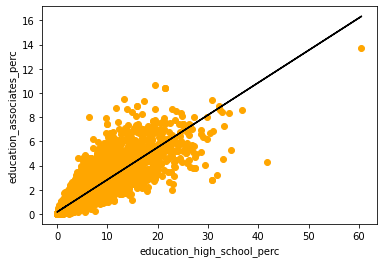

In [99]:
# Print out the r-squared value along with the plot.
x_values = data["education_high_school_perc"]
y_values = data["education_associates_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#FFA600")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_high_school_perc')
plt.ylabel('education_associates_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [100]:
feature = data["education_high_school_perc"]
target = data["education_associates_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     education_associates_perc   R-squared:                       0.779
Model:                                   OLS   Adj. R-squared:                  0.779
Method:                        Least Squares   F-statistic:                 3.227e+04
Date:                       Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                               16:38:23   Log-Likelihood:                -9732.0
No. Observations:                       9171   AIC:                         1.947e+04
Df Residuals:                           9169   BIC:                         1.948e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1661      0.010     17.180      0.000       0.147       0.185
education_high_school_perc     0.2673      0.001    179.647      0.000       0.264       0.270
==============================================================================
Omnibus:                     2821.047   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49677.912
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                      14.219   Cond. No.                         8.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.26729605]
0.16610995841597975


In [102]:
actual = data["education_high_school_perc"]
predictions = reg.predict(data["education_associates_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.4458318320664325
MSE: 34.82566706565131
RMSE: 5.901327568069011
MAE: 3.748428682317382


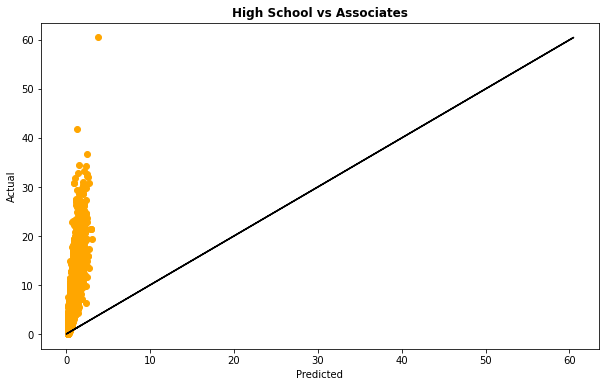

In [103]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FFA600")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("High School vs Associates", fontweight="bold")

plt.show()

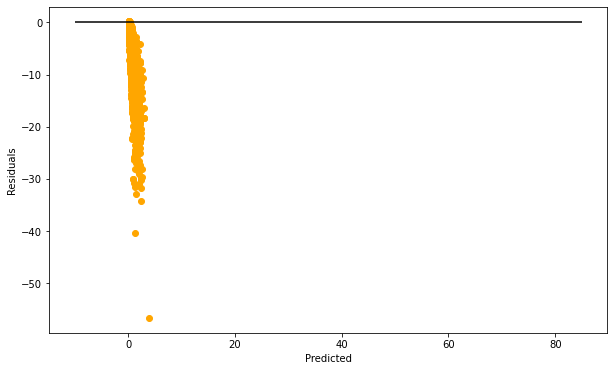

In [104]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#FFA600")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

High School vs Bachelors "education_high_school_perc" "education_bachelors_perc"

The r-squared is: 0.47776358476834163


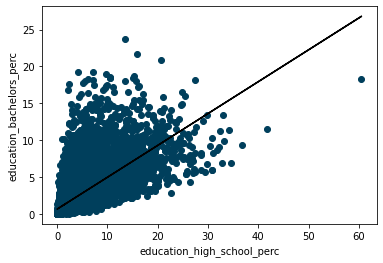

In [105]:
# Print out the r-squared value along with the plot.
x_values = data["education_high_school_perc"]
y_values = data["education_bachelors_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#003F5C")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_high_school_perc')
plt.ylabel('education_bachelors_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [106]:
feature = data["education_high_school_perc"]
target = data["education_bachelors_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_bachelors_perc   R-squared:                       0.478
Model:                                  OLS   Adj. R-squared:                  0.478
Method:                       Least Squares   F-statistic:                     8388.
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                              16:38:23   Log-Likelihood:                -20312.
No. Observations:                      9171   AIC:                         4.063e+04
Df Residuals:                          9169   BIC:                         4.064e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.6590      0.031     21.504      0.000       0.599       0.719
education_high_school_perc     0.4319      0.005     91.587      0.000       0.423       0.441
==============================================================================
Omnibus:                     4681.359   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38149.179
Skew:                           2.318   Prob(JB):                         0.00
Kurtosis:                      11.851   Cond. No.                         8.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.43193211]
0.659046116547932


In [108]:
actual = data["education_high_school_perc"]
predictions = reg.predict(data["education_bachelors_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.036393064794661534
MSE: 23.210344082445015
RMSE: 4.817711498465326
MAE: 2.786726166211346


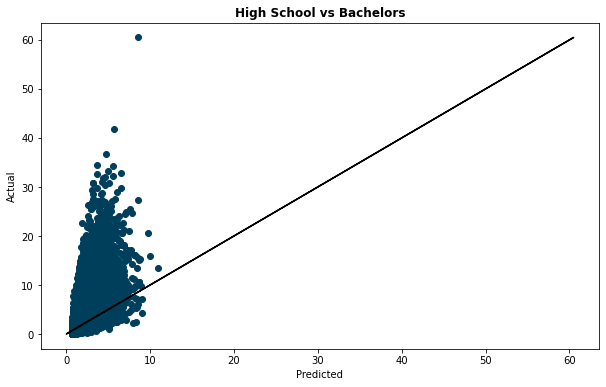

In [109]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#003F5C")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("High School vs Bachelors", fontweight="bold")

plt.show()

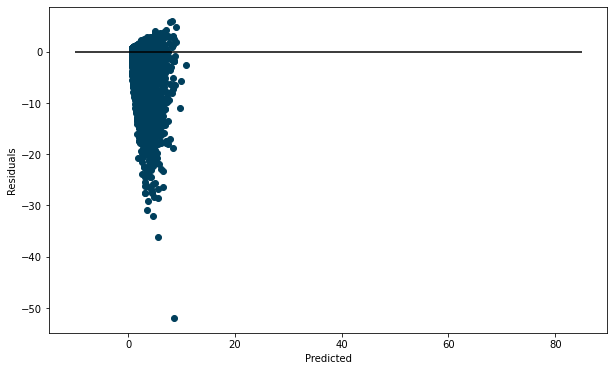

In [110]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#003F5C")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

High School vs Masters

The r-squared is: 0.3449649241891369


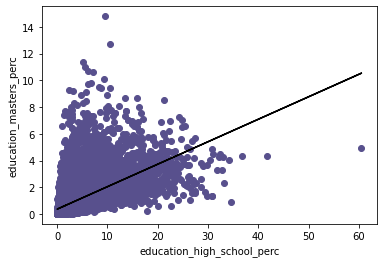

In [111]:
# Print out the r-squared value along with the plot.
x_values = data["education_high_school_perc"]
y_values = data["education_masters_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#58508D")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_high_school_perc')
plt.ylabel('education_masters_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [112]:
feature = data["education_high_school_perc"]
target = data["education_masters_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     education_masters_perc   R-squared:                       0.345
Model:                                OLS   Adj. R-squared:                  0.345
Method:                     Least Squares   F-statistic:                     4829.
Date:                    Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                            16:38:24   Log-Likelihood:                -14191.
No. Observations:                    9171   AIC:                         2.839e+04
Df Residuals:                        9169   BIC:                         2.840e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3614      0.016     22.981      0.000       0.331       0.392
education_high_school_perc     0.1681      0.002     69.489      0.000       0.163       0.173
==============================================================================
Omnibus:                     5816.767   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83460.250
Skew:                           2.843   Prob(JB):                         0.00
Kurtosis:                      16.641   Cond. No.                         8.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.16813711]
0.3613534291832522


In [114]:
actual = data["education_high_school_perc"]
predictions = reg.predict(data["education_masters_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.5193713116725092
MSE: 36.59700822452048
RMSE: 6.049546117232307
MAE: 3.745594659711424


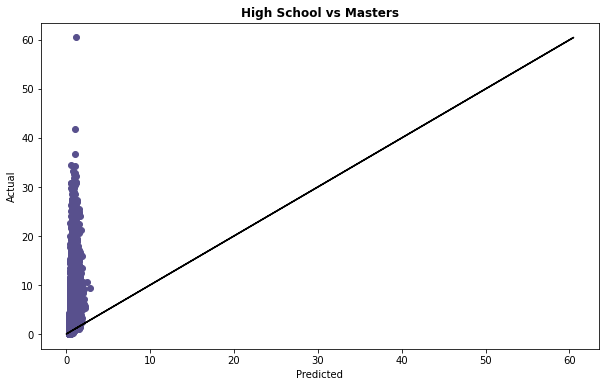

In [115]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#58508D")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("High School vs Masters", fontweight="bold")

plt.show()

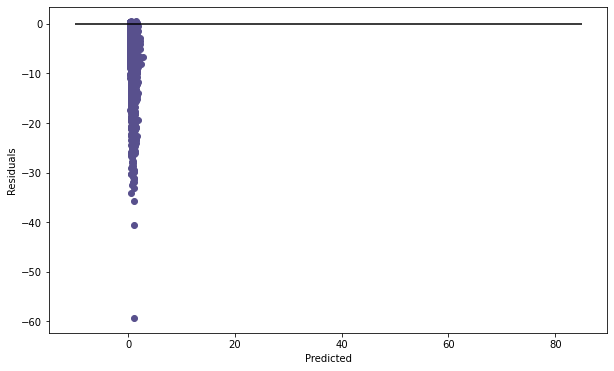

In [116]:

residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#58508D")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

High School vs Doctorate "education_high_school_perc" "education_doctorate_perc"

The r-squared is: 0.09844169738057665


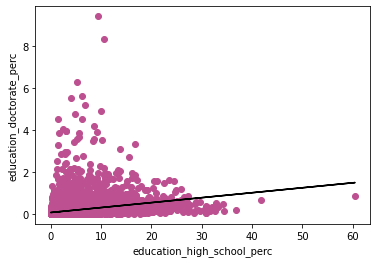

In [117]:
# Print out the r-squared value along with the plot.
x_values = data["education_high_school_perc"]
y_values = data["education_doctorate_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#BC5090")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_high_school_perc')
plt.ylabel('education_doctorate_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [118]:
feature = data["education_high_school_perc"]
target = data["education_doctorate_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_doctorate_perc   R-squared:                       0.098
Model:                                  OLS   Adj. R-squared:                  0.098
Method:                       Least Squares   F-statistic:                     1001.
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):          1.24e-208
Time:                              16:38:25   Log-Likelihood:                -3409.4
No. Observations:                      9171   AIC:                             6823.
Df Residuals:                          9169   BIC:                             6837.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0715      0.005     14.731      0.000       0.062       0.081
education_high_school_perc     0.0236      0.001     31.641      0.000       0.022       0.025
==============================================================================
Omnibus:                    13633.703   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7652673.827
Skew:                           9.003   Prob(JB):                         0.00
Kurtosis:                     143.365   Cond. No.                         8.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.02362741]
0.07148175343646553


In [120]:
actual = data["education_high_school_perc"]
predictions = reg.predict(data["education_doctorate_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.7256598084365633
MSE: 41.565867222119685
RMSE: 6.447159624371006
MAE: 4.184383533735471


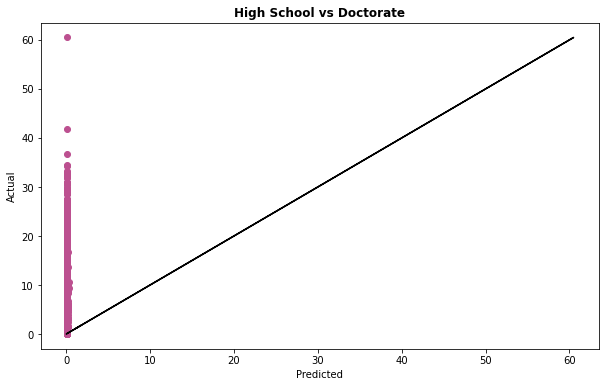

In [121]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#BC5090")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("High School vs Doctorate", fontweight="bold")

plt.show()

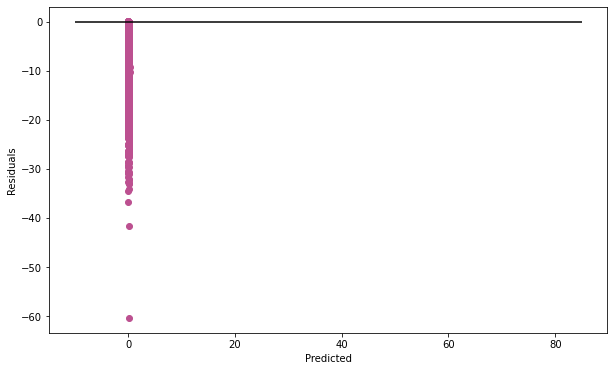

In [122]:

residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#BC5090")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

Professional vs Associates "education_professional_perc" "education_associates_perc"

The r-squared is: 0.304847758510314


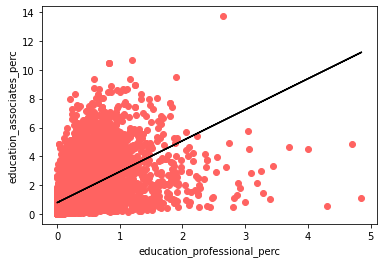

In [123]:
# Print out the r-squared value along with the plot.
x_values = data["education_professional_perc"]
y_values = data["education_associates_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#FF6361")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_professional_perc')
plt.ylabel('education_associates_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [124]:
feature = data["education_professional_perc"]
target = data["education_associates_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     education_associates_perc   R-squared:                       0.305
Model:                                   OLS   Adj. R-squared:                  0.305
Method:                        Least Squares   F-statistic:                     4021.
Date:                       Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                               16:38:26   Log-Likelihood:                -14982.
No. Observations:                       9171   AIC:                         2.997e+04
Df Residuals:                           9169   BIC:                         2.998e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7879      0.015     51.513      0.000       0.758       0.818
education_professional_perc     2.1499      0.034     63.411      0.000       2.083       2.216
==============================================================================
Omnibus:                     2576.204   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15752.793
Skew:                           1.205   Prob(JB):                         0.00
Kurtosis:                       8.951   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[2.14992612]
0.7879224870083508


In [126]:
actual = data["education_professional_perc"]
predictions = reg.predict(data["education_associates_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -137.95279629966737
MSE: 20.252129773707257
RMSE: 4.5002366353012215
MAE: 3.354182071773243


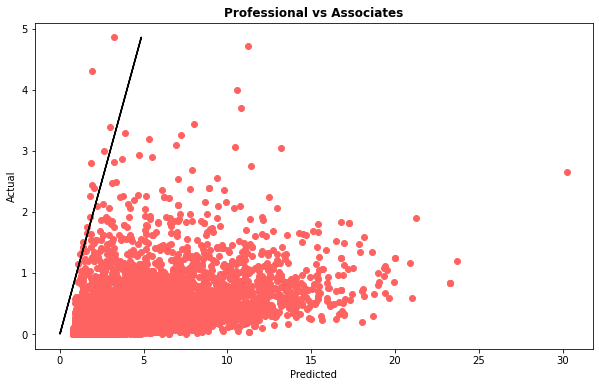

In [127]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FF6361")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Professional vs Associates", fontweight="bold")

plt.show()

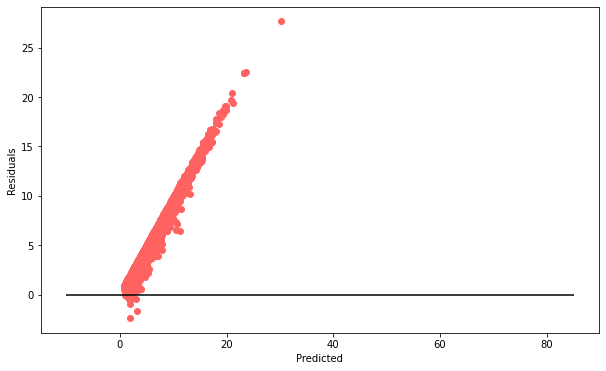

In [128]:

residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#FF6361")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

Professional vs Bachelors "education_professional_perc" "education_bachelors_perc"

The r-squared is: 0.6633557114624572


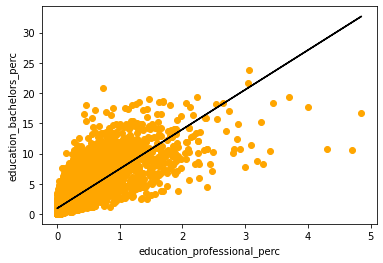

In [129]:
#Print out the r-squared value along with the plot.
x_values = data["education_professional_perc"]
y_values = data["education_bachelors_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#FFA600")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_professional_perc')
plt.ylabel('education_bachelors_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [130]:
feature = data["education_professional_perc"]
target = data["education_bachelors_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_bachelors_perc   R-squared:                       0.663
Model:                                  OLS   Adj. R-squared:                  0.663
Method:                       Least Squares   F-statistic:                 1.807e+04
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                              16:38:26   Log-Likelihood:                -18298.
No. Observations:                      9171   AIC:                         3.660e+04
Df Residuals:                          9169   BIC:                         3.661e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9263      0.022     42.180      0.000       0.883       0.969
education_professional_perc     6.5429      0.049    134.415      0.000       6.447       6.638
==============================================================================
Omnibus:                     2260.910   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55265.036
Skew:                           0.615   Prob(JB):                         0.00
Kurtosis:                      14.963   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[6.54291573]
0.9262570480112597


In [132]:
actual = data["education_professional_perc"]
predictions = reg.predict(data["education_bachelors_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -4668.352918414437
MSE: 680.5501132847246
RMSE: 26.087355429110183
MAE: 17.035838002319867


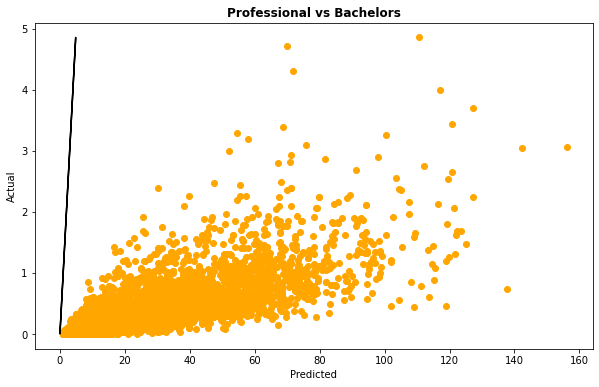

In [133]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FFA600")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Professional vs Bachelors", fontweight="bold")

plt.show()

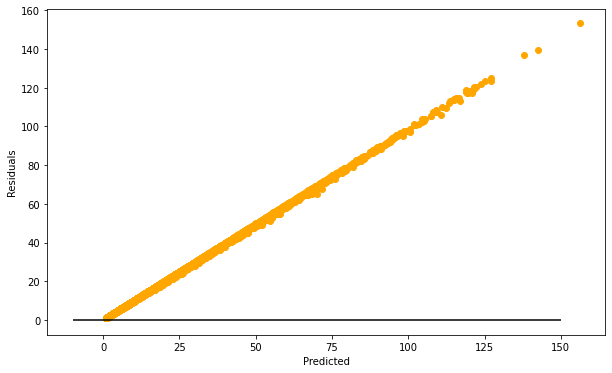

In [134]:

residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#FFA600")
plt.hlines(0, -10, 150, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

Professional vs Masters "education_professional_perc" "education_masters_perc"

The r-squared is: 0.7359827584517563


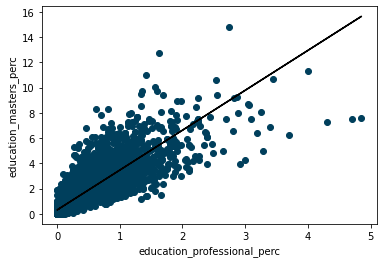

In [135]:
# Print out the r-squared value along with the plot.
x_values = data["education_professional_perc"]
y_values = data["education_masters_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#003F5C")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_professional_perc')
plt.ylabel('education_masters_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [136]:
feature = data["education_professional_perc"]
target = data["education_masters_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     education_masters_perc   R-squared:                       0.736
Model:                                OLS   Adj. R-squared:                  0.736
Method:                     Least Squares   F-statistic:                 2.556e+04
Date:                    Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                            16:38:27   Log-Likelihood:                -10025.
No. Observations:                    9171   AIC:                         2.005e+04
Df Residuals:                        9169   BIC:                         2.007e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3187      0.009     35.773      0.000       0.301       0.336
education_professional_perc     3.1572      0.020    159.874      0.000       3.118       3.196
==============================================================================
Omnibus:                     2944.972   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86536.814
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                      17.933   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[3.15717784]
0.31869753561825986


In [138]:
actual = data["education_professional_perc"]
predictions = reg.predict(data["education_masters_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -198.16962500273007
MSE: 29.028628425994146
RMSE: 5.387822234075113
MAE: 3.480326341616341


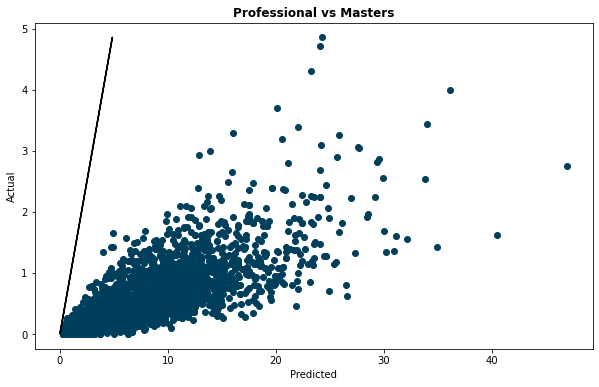

In [139]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#003F5C")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Professional vs Masters", fontweight="bold")

plt.show()

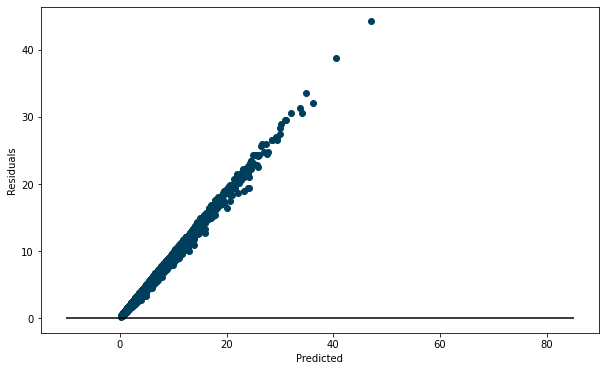

In [140]:

residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#003F5C")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

Professional vs Doctorate "education_professional_perc" "education_doctorate_perc"

The r-squared is: 0.5415328542168769


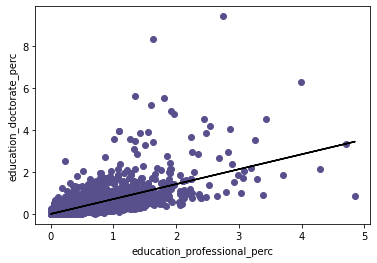

In [141]:
# Print out the r-squared value along with the plot.
x_values = data["education_professional_perc"]
y_values = data["education_doctorate_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#58508D")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_professional_perc')
plt.ylabel('education_doctorate_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [142]:
feature = data["education_professional_perc"]
target = data["education_doctorate_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_doctorate_perc   R-squared:                       0.542
Model:                                  OLS   Adj. R-squared:                  0.541
Method:                       Least Squares   F-statistic:                 1.083e+04
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                              16:38:28   Log-Likelihood:                -308.49
No. Observations:                      9171   AIC:                             621.0
Df Residuals:                          9169   BIC:                             635.2
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0009      0.003      0.289      0.772      -0.005       0.007
education_professional_perc     0.7124      0.007    104.068      0.000       0.699       0.726
==============================================================================
Omnibus:                    14914.160   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20102607.053
Skew:                          10.459   Prob(JB):                         0.00
Kurtosis:                     231.407   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.71240678]
0.0008933707407811908


In [144]:
actual = data["education_professional_perc"]
predictions = reg.predict(data["education_doctorate_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.44573287591654154
MSE: 0.08078347485738634
RMSE: 0.28422433896024163
MAE: 0.141698885498443


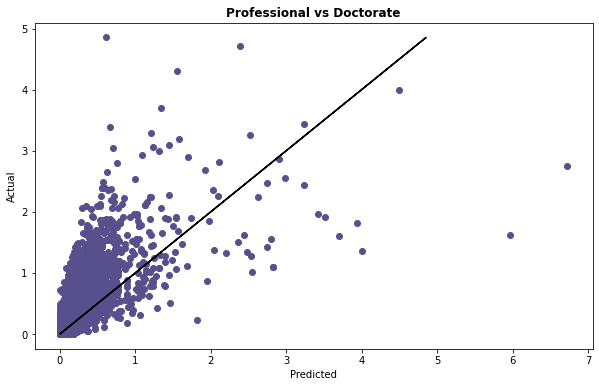

In [145]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#58508D")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Professional vs Doctorate", fontweight="bold")

plt.show()

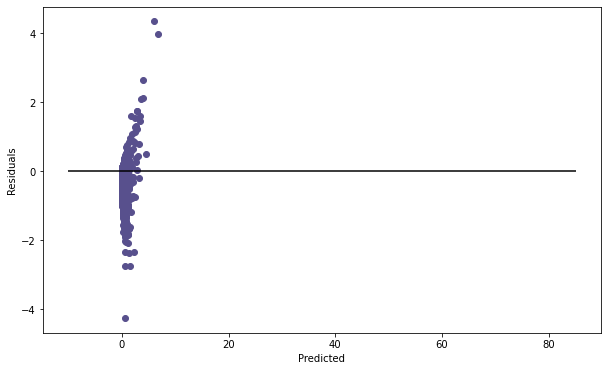

In [146]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#58508D")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

Associates vs Bachelors "education_associates_perc" "education_bachelors_perc"

The r-squared is: 0.6525399858528603


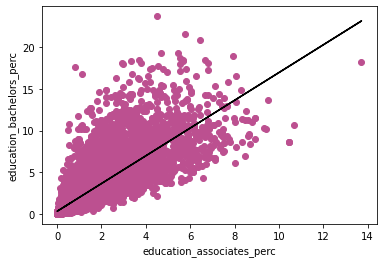

In [147]:
# Print out the r-squared value along with the plot.
x_values = data["education_associates_perc"]
y_values = data["education_bachelors_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#BC5090")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_associates_perc')
plt.ylabel('education_bachelors_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [148]:
feature = data["education_associates_perc"]
target = data["education_bachelors_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_bachelors_perc   R-squared:                       0.653
Model:                                  OLS   Adj. R-squared:                  0.653
Method:                       Least Squares   F-statistic:                 1.722e+04
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                              16:38:29   Log-Likelihood:                -18443.
No. Observations:                      9171   AIC:                         3.689e+04
Df Residuals:                          9169   BIC:                         3.690e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3246      0.025     12.921      0.000       0.275       0.374
education_associates_perc     1.6666      0.013    131.224      0.000       1.642       1.691
==============================================================================
Omnibus:                     4520.339   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44512.719
Skew:                           2.142   Prob(JB):                         0.00
Kurtosis:                      12.906   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[1.66655489]
0.32457717458942437


In [150]:
actual = data["education_associates_perc"]
predictions = reg.predict(data["education_bachelors_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -10.855406339632397
MSE: 26.19895215597977
RMSE: 5.118491199169905
MAE: 3.185289397862034


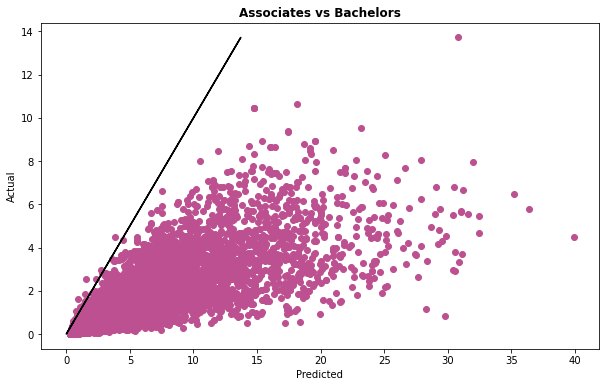

In [151]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#BC5090")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Associates vs Bachelors", fontweight="bold")

plt.show()

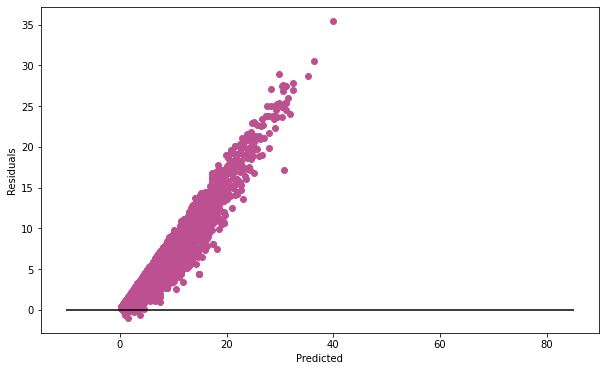

In [152]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#BC5090")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

Associates vs Masters "education_associates_perc" "education_masters_perc"

The r-squared is: 0.5124259817738676


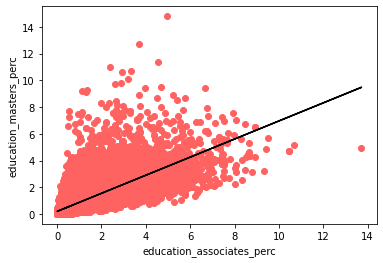

In [153]:
# Print out the r-squared value along with the plot.
x_values = data["education_associates_perc"]
y_values = data["education_masters_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#FF6361")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_associates_perc')
plt.ylabel('education_masters_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [154]:
feature = data["education_associates_perc"]
target = data["education_bachelors_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_bachelors_perc   R-squared:                       0.653
Model:                                  OLS   Adj. R-squared:                  0.653
Method:                       Least Squares   F-statistic:                 1.722e+04
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                              16:38:29   Log-Likelihood:                -18443.
No. Observations:                      9171   AIC:                         3.689e+04
Df Residuals:                          9169   BIC:                         3.690e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3246      0.025     12.921      0.000       0.275       0.374
education_associates_perc     1.6666      0.013    131.224      0.000       1.642       1.691
==============================================================================
Omnibus:                     4520.339   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44512.719
Skew:                           2.142   Prob(JB):                         0.00
Kurtosis:                      12.906   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[1.66655489]
0.32457717458942437


In [156]:
actual = data["education_associates_perc"]
predictions = reg.predict(data["education_masters_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.526949435113726
MSE: 3.374365588922132
RMSE: 1.836944634147184
MAE: 0.9925983569051438


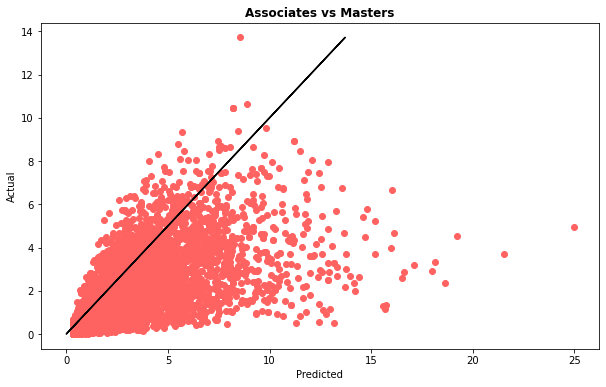

In [157]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FF6361")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Associates vs Masters", fontweight="bold")

plt.show()

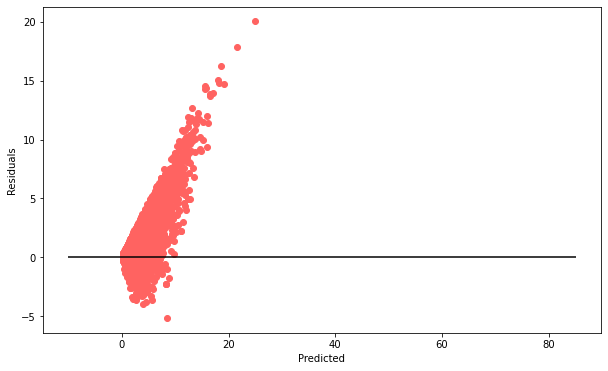

In [158]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#FF6361")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

Associates vs Doctorate "education_associates_perc"  "education_doctorate_perc"

The r-squared is: 0.17759796462509664


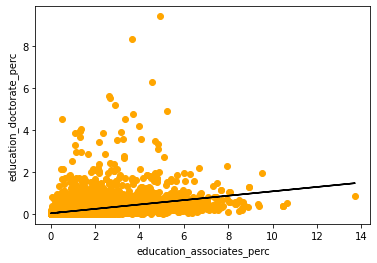

In [159]:
# Print out the r-squared value along with the plot.
x_values = data["education_associates_perc"]
y_values = data["education_doctorate_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#FFA600")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_associates_perc')
plt.ylabel('education_doctorate_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [160]:
feature = data["education_associates_perc"]
target = data["education_doctorate_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_doctorate_perc   R-squared:                       0.178
Model:                                  OLS   Adj. R-squared:                  0.178
Method:                       Least Squares   F-statistic:                     1980.
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                              16:38:30   Log-Likelihood:                -2988.0
No. Observations:                      9171   AIC:                             5980.
Df Residuals:                          9169   BIC:                             5994.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0354      0.005      7.607      0.000       0.026       0.045
education_associates_perc     0.1048      0.002     44.498      0.000       0.100       0.109
==============================================================================
Omnibus:                    13918.065   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8897989.616
Skew:                           9.340   Prob(JB):                         0.00
Kurtosis:                     154.448   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.10477378]
0.03542865012525803


In [162]:
actual = data["education_associates_perc"]
predictions = reg.predict(data["education_doctorate_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.6871402802324851
MSE: 3.728367144572098
RMSE: 1.930898015062447
MAE: 1.2519544454064875


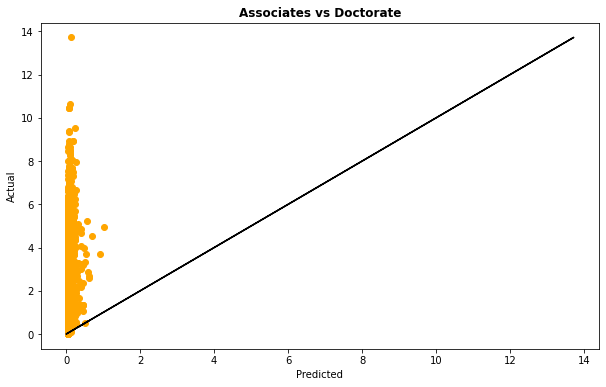

In [163]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#FFA600")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Associates vs Doctorate", fontweight="bold")

plt.show()

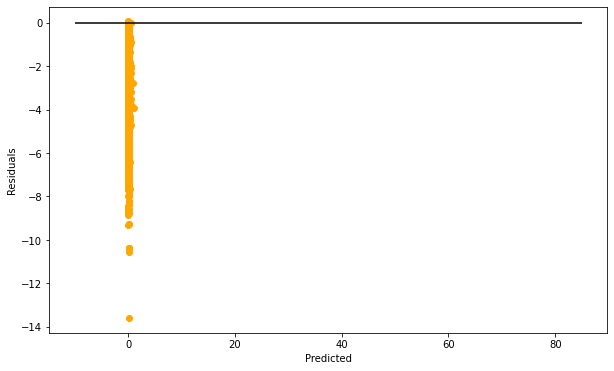

In [164]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#FFA600")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

Bachelors vs Masters "education_bachelors_perc" "education_masters_perc"

The r-squared is: 0.8790859450228222


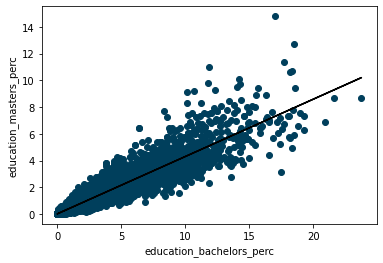

In [165]:
# Print out the r-squared value along with the plot.
x_values = data["education_bachelors_perc"]
y_values = data["education_masters_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#003F5C")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_bachelors_perc')
plt.ylabel('education_masters_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [166]:
feature = data["education_bachelors_perc"]
target = data["education_masters_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     education_masters_perc   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.879
Method:                     Least Squares   F-statistic:                 6.666e+04
Date:                    Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                            16:38:31   Log-Likelihood:                -6443.7
No. Observations:                    9171   AIC:                         1.289e+04
Df Residuals:                        9169   BIC:                         1.291e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0042      0.007      0.642      0.521      -0.009       0.017
education_bachelors_perc     0.4295      0.002    258.189      0.000       0.426       0.433
==============================================================================
Omnibus:                     4880.988   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189527.017
Skew:                           1.900   Prob(JB):                         0.00
Kurtosis:                      24.944   Cond. No.                         5.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.42951942]
0.004223533539145619


In [168]:
actual = data["education_bachelors_perc"]
predictions = reg.predict(data["education_masters_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.10865197389334202
MSE: 10.427851206269354
RMSE: 3.2292183584064666
MAE: 2.031911649624799


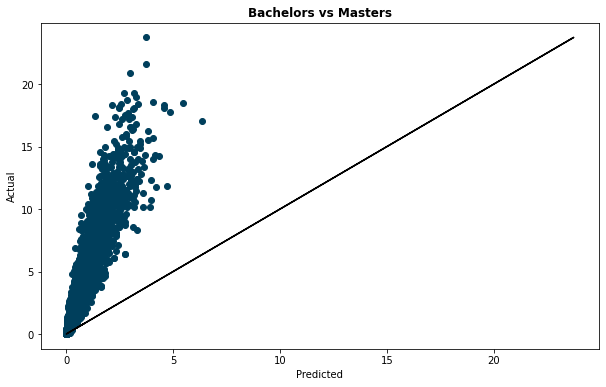

In [169]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#003F5C")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Bachelors vs Masters", fontweight="bold")

plt.show()

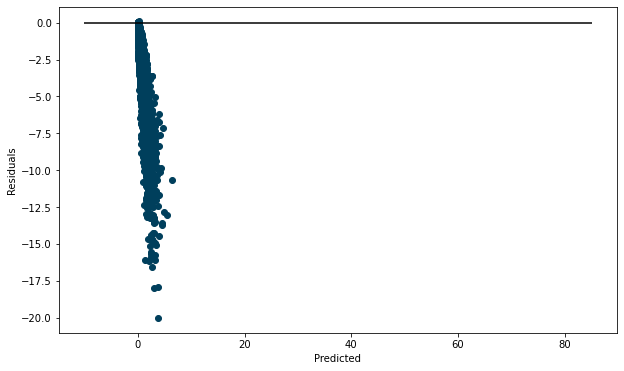

In [170]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#003F5C")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

Bachelors vs Doctorate "education_bachelors_perc" "education_doctorate_perc"

The r-squared is: 0.4664467157780776


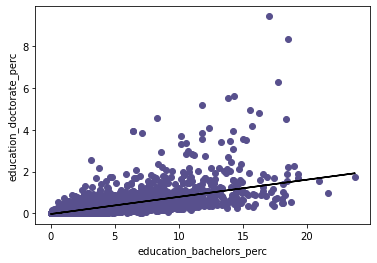

In [171]:
# Print out the r-squared value along with the plot.
x_values = data["education_bachelors_perc"]
y_values = data["education_doctorate_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#58508D")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_bachelors_perc')
plt.ylabel('education_doctorate_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [172]:
feature = data["education_bachelors_perc"]
target = data["education_doctorate_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_doctorate_perc   R-squared:                       0.466
Model:                                  OLS   Adj. R-squared:                  0.466
Method:                       Least Squares   F-statistic:                     8016.
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                              16:38:32   Log-Likelihood:                -1004.0
No. Observations:                      9171   AIC:                             2012.
Df Residuals:                          9169   BIC:                             2026.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0335      0.004     -9.223      0.000      -0.041      -0.026
education_bachelors_perc     0.0823      0.001     89.531      0.000       0.081       0.084
==============================================================================
Omnibus:                    14865.349   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16274594.807
Skew:                          10.485   Prob(JB):                         0.00
Kurtosis:                     208.305   Cond. No.                         5.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.08230355]
-0.033542849695856636


In [174]:
actual = data["education_bachelors_perc"]
predictions = reg.predict(data["education_doctorate_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.6607664842438301
MSE: 15.620975918381255
RMSE: 3.952338031897228
MAE: 2.5182525247298777


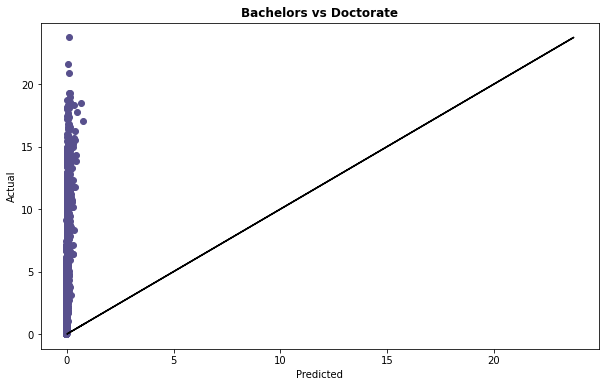

In [175]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#58508D")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Bachelors vs Doctorate", fontweight="bold")

plt.show()

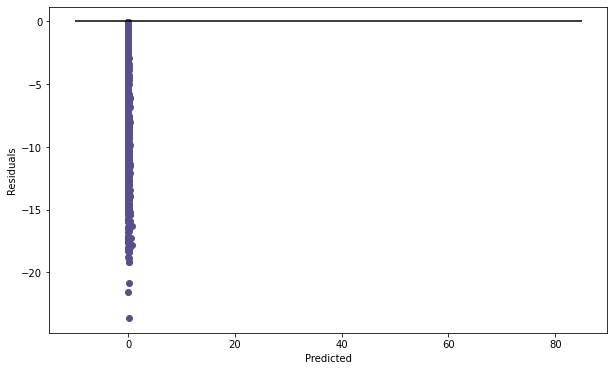

In [176]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#58508D")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

Masters vs Doctorate "education_masters_perc" "education_doctorate_perc"

The r-squared is: 0.6206003765930713


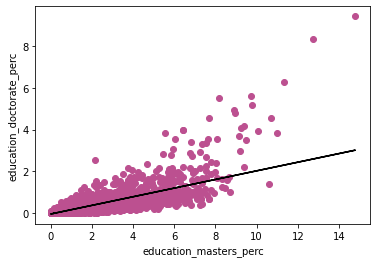

In [178]:
# Print out the r-squared value along with the plot.
x_values = data["education_masters_perc"]
y_values = data["education_doctorate_perc"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#BC5090")
plt.plot(x_values,regress_values,"black")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('education_masters_perc')
plt.ylabel('education_doctorate_perc')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [179]:
feature = data["education_masters_perc"]
target = data["education_doctorate_perc"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     education_doctorate_perc   R-squared:                       0.621
Model:                                  OLS   Adj. R-squared:                  0.621
Method:                       Least Squares   F-statistic:                 1.500e+04
Date:                      Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                              20:17:05   Log-Likelihood:                 559.54
No. Observations:                      9171   AIC:                            -1115.
Df Residuals:                          9169   BIC:                            -1101.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0512      0.003    -17.081      0.000      -0.057      -0.045
education_masters_perc     0.2072      0.002    122.467      0.000       0.204       0.211
==============================================================================
Omnibus:                    13688.586   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11826275.026
Skew:                           8.874   Prob(JB):                         0.00
Kurtosis:                     178.025   Cond. No.                         2.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
reg = LinearRegression() 
reg.fit(np.array(feature).reshape(-1, 1), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.20723182]
-0.05117690923386575


In [181]:
actual = data["education_masters_perc"]
predictions = reg.predict(data["education_doctorate_perc"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: -0.5223440087259441
MSE: 3.0050151346777234
RMSE: 1.733497947699311
MAE: 1.0930467627943


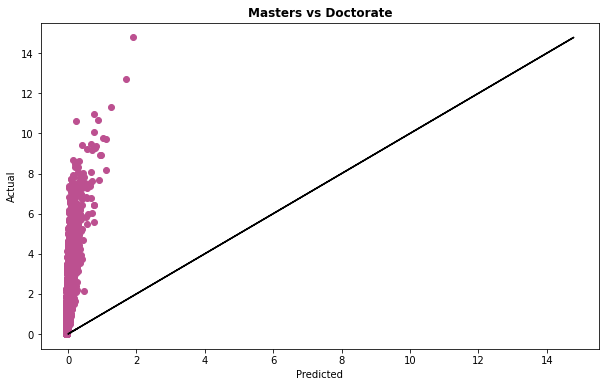

In [182]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="#BC5090")
plt.plot(actual, actual, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Masters vs Doctorate", fontweight="bold")

plt.show()

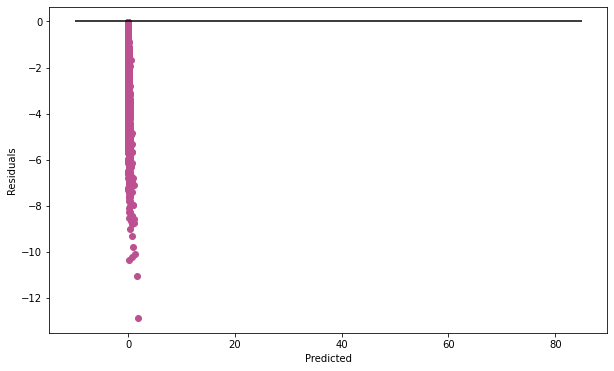

In [183]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="#BC5090")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()